In [2]:
# Nescessary imports

%matplotlib inline

# supress warnings
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # supress tensorflow warnings


# import libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# set random seed
random.seed(42)

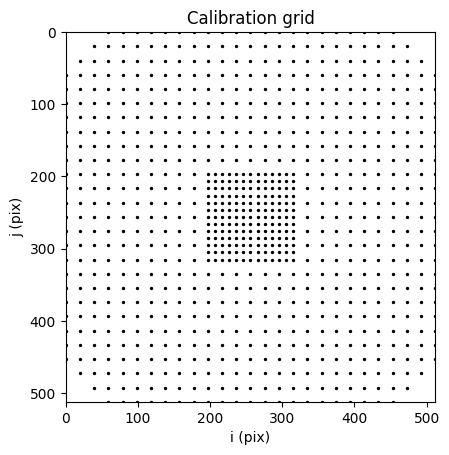

In [127]:
plt.axes().set_aspect('equal')
plt.xlim(0, 512)
plt.ylim(0, 512)
plt.gca().invert_yaxis()
plt.margins(0,0)

# create a 27x27 grid of points homogeneously distributed in the image
i = np.linspace(0, 512, 27)
j = np.linspace(0, 512, 27)
i, j = np.meshgrid(i, j)
i = i.flatten()
j = j.flatten()

# double the density of points in the center
i_center = np.linspace(i[10] + (i[11] - i[10]) / 2, i[16] - (i[16] - i[15]) / 2, 6)
i_center = np.append(i_center, np.linspace(i[10], i[16], 7))
j_center = np.linspace(j[27*10] + (j[27*11] - j[27*10]) / 2, j[27*16] - (j[27*16] - j[27*15]) / 2, 6)
j_center = np.append(j_center, np.linspace(j[27*10], j[27*16], 7))
i_center, j_center = np.meshgrid(i_center, j_center)
i_center = i_center.flatten()
j_center = j_center.flatten()

i = np.append(i, i_center)
j = np.append(j, j_center)

# remove the corners

i = np.delete(i, [0, 1, 2, 27, 28, 54, 24, 25, 26, 52, 53, 80, 648, 675, 676, 702, 703, 704, 674, 700, 701, 726, 727, 728])
j = np.delete(j, [0, 1, 2, 27, 28, 54, 24, 25, 26, 52, 53, 80, 648, 675, 676, 702, 703, 704, 674, 700, 701, 726, 727, 728])

# drop the duplicates
i, j = np.unique(np.array([i, j]), axis=1)


# plot the grid
plt.scatter(i, j, s=2, c='black')

plt.xlabel('i (pix)')
plt.ylabel('j (pix)')
plt.title('Calibration grid')
plt.show()